In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import os
import xarray as xr
import numpy as np
import natsort
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns
import pickle
import sys

function_path = './functions/'
sys.path.append(function_path)
# from KCC_function import *
from Plot_function import *
from analysis_function import *
from obs_function import *

In [3]:
path = '/Users/tongli1997/Library/CloudStorage/OneDrive-UniversityofVictoria/Codes_run_on_local/Global_regional_attribution/Dec_2025/input_file/'
#### Grid monthly analysis data
# name = 'HadCRUT.5.0.2.0.analysis.anomalies.ensemble_mean.nc'
# f = xr.open_dataset(path + name)
# tas_had = f['tas_mean'].rename({'latitude': 'lat','longitude': 'lon'})

#### Non-infilled data
name = 'HadCRUT.5.0.2.0.non-infilled.anomalies.ensemble_mean.nc'
f = xr.open_dataset(path + name)
tas_had_nan = f['tas_mean'].rename({'latitude': 'lat','longitude': 'lon'})
tas_had_reshaped_nan = tas_had_nan.groupby('time.year').apply(lambda x: x.groupby('time.month').mean())
tas_had_yr_mon_nan = tas_had_reshaped_nan.transpose('year', 'month', 'lat', 'lon')


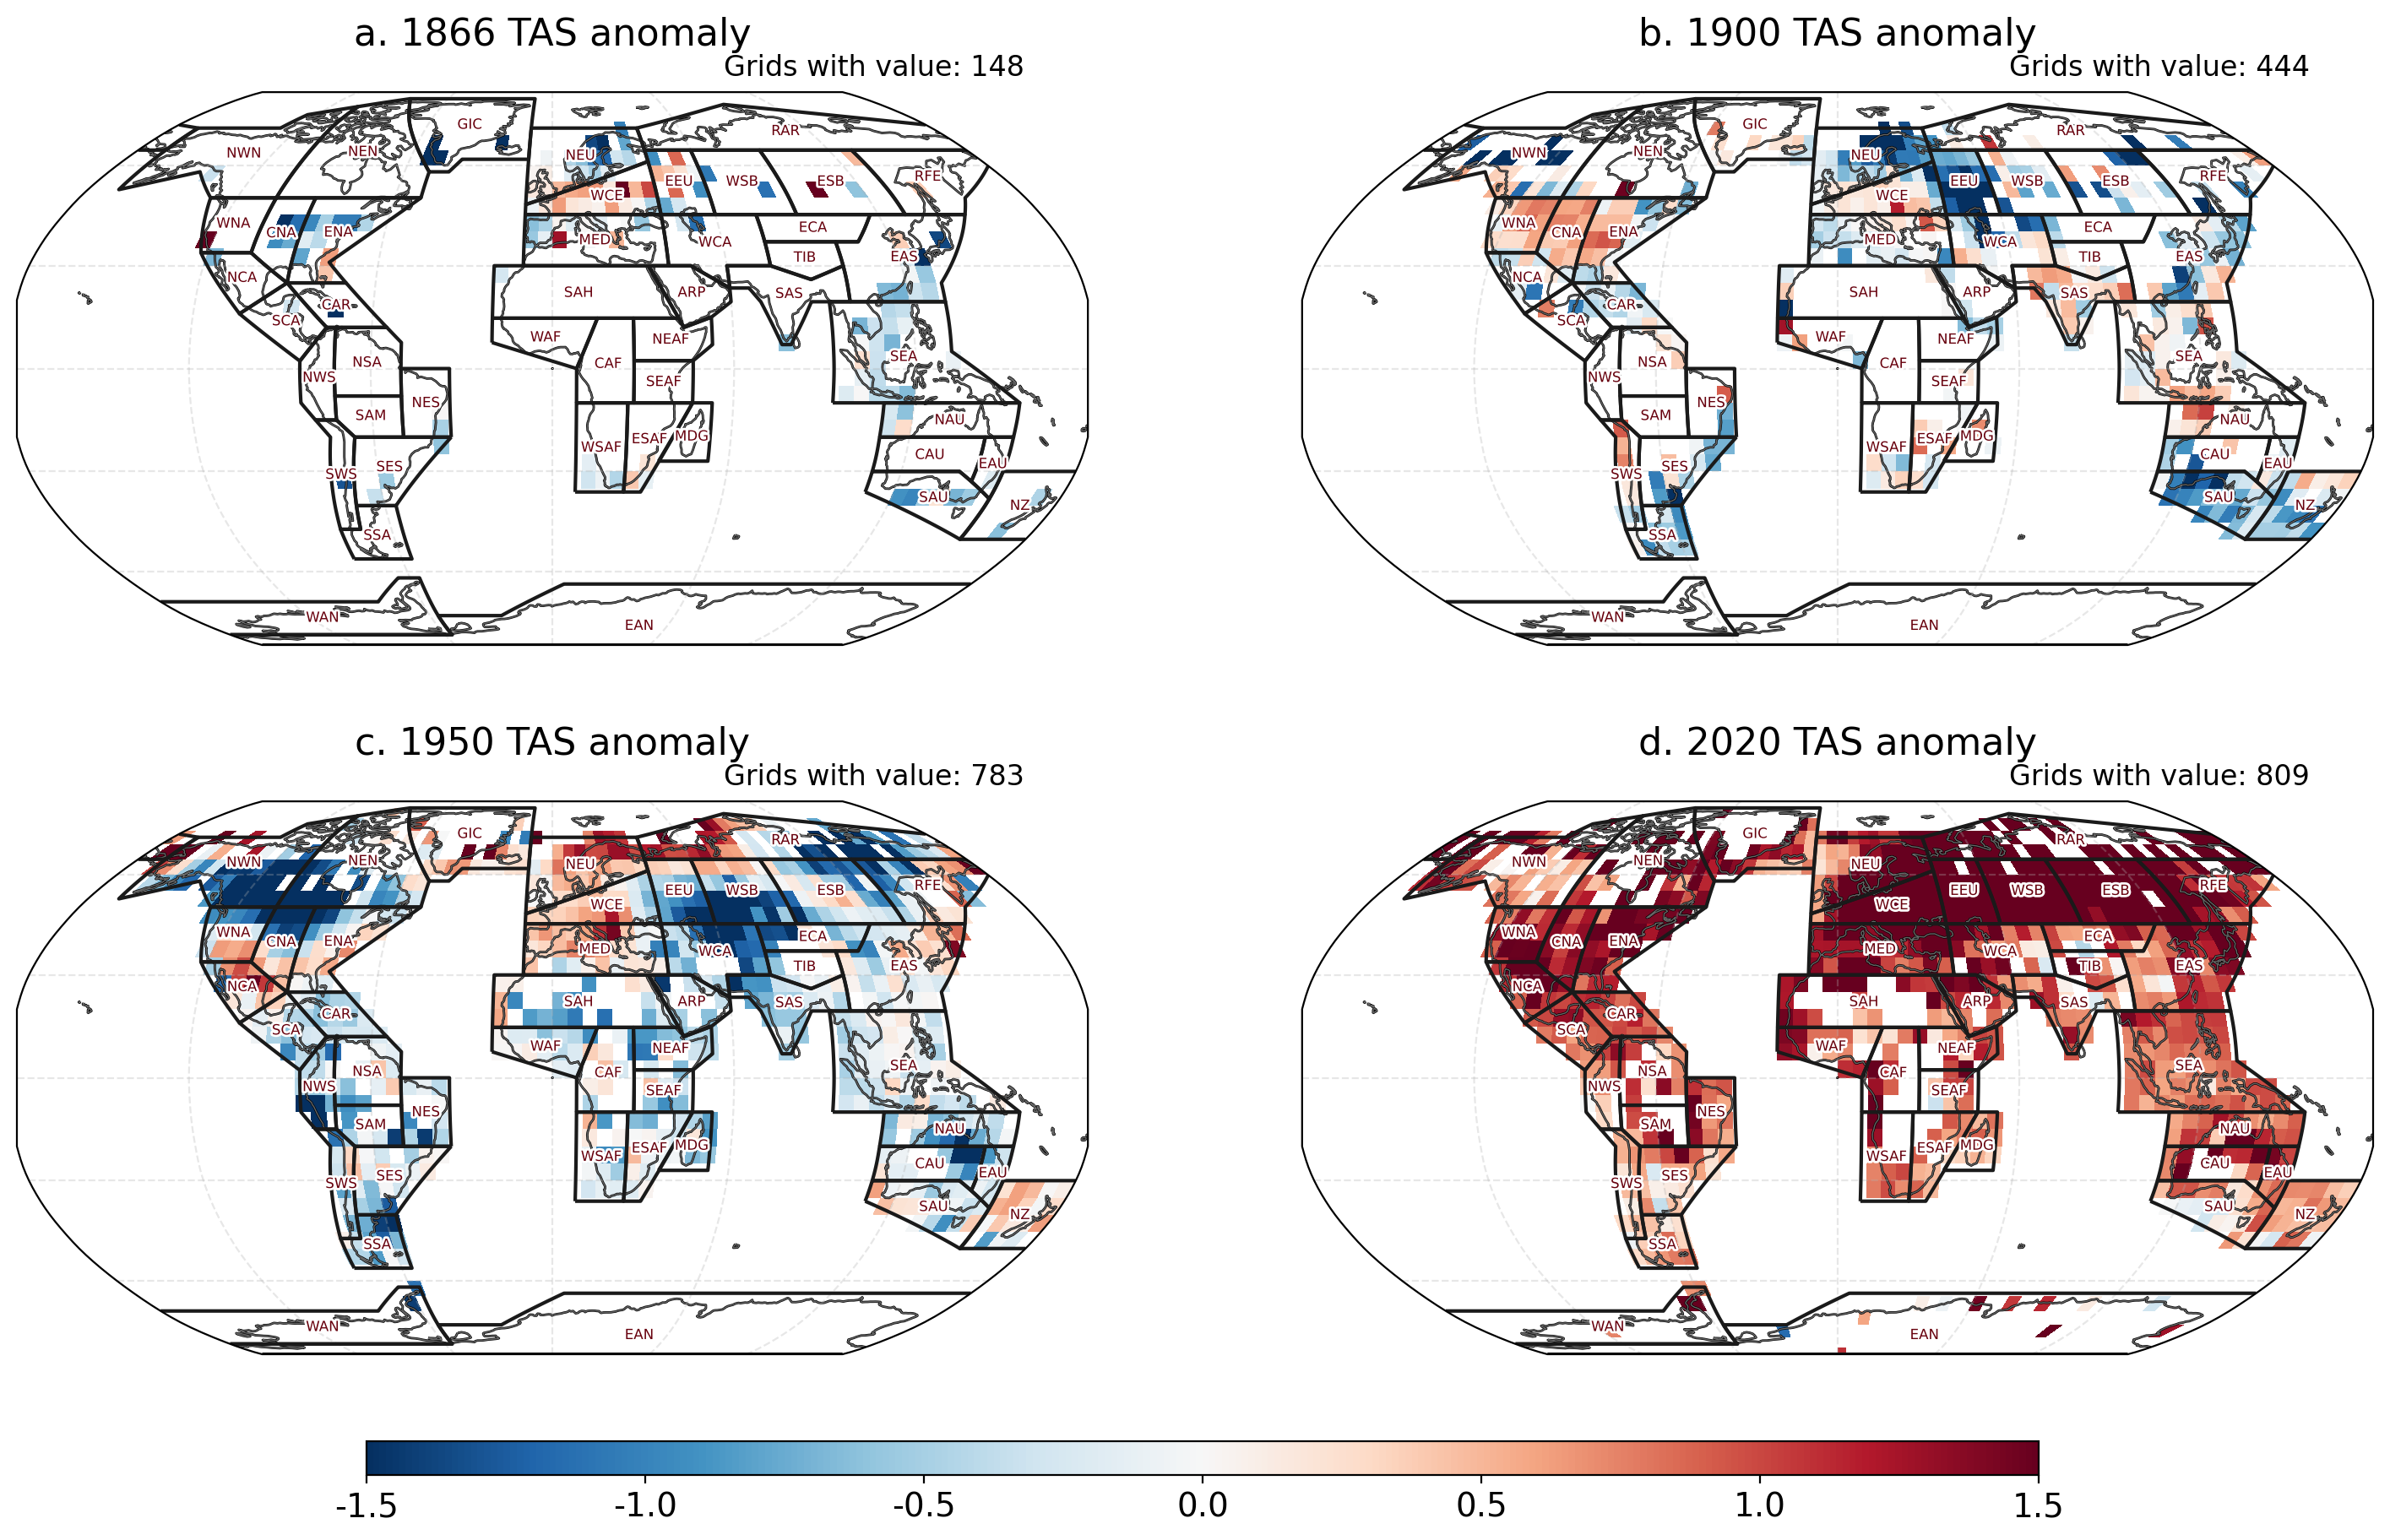

In [ ]:
tas_had_yr_75per = filter_years_with_valid_quarters(tas_had_yr_mon_nan, min_valid_quarters=3)
tas_had_yr_75per

# results = compute_continent_stats(tas_had_yr_75per, threshold=0.5)
# result = compute_global_ar6_mean(tas_had_yr_75per, threshold=0.3)

# global_ar6_mean_mask = result["global_ar6_mean_masked"]

tas_data = tas_had_yr_75per

mask_ar6 = regionmask.defined_regions.ar6.land.mask(tas_data)
mask_ar6_land = ~np.isnan(mask_ar6)
tas_ar6_land = tas_data.where(mask_ar6_land)
tas_ar6_land

notnan_counts_grid_had, notnan_percent_had = notnan_count(tas_ar6_land)

years = [1866, 1900, 1950, 2020]

plot_tas_anomaly_maps(tas_ar6_land, years, notnan_counts_grid_had, 
                          cmap=plt.cm.RdBu_r, vmin=-1.5, vmax=1.5, 
                          proj=ccrs.Robinson(), figsize=(18, 10), dpi=200)

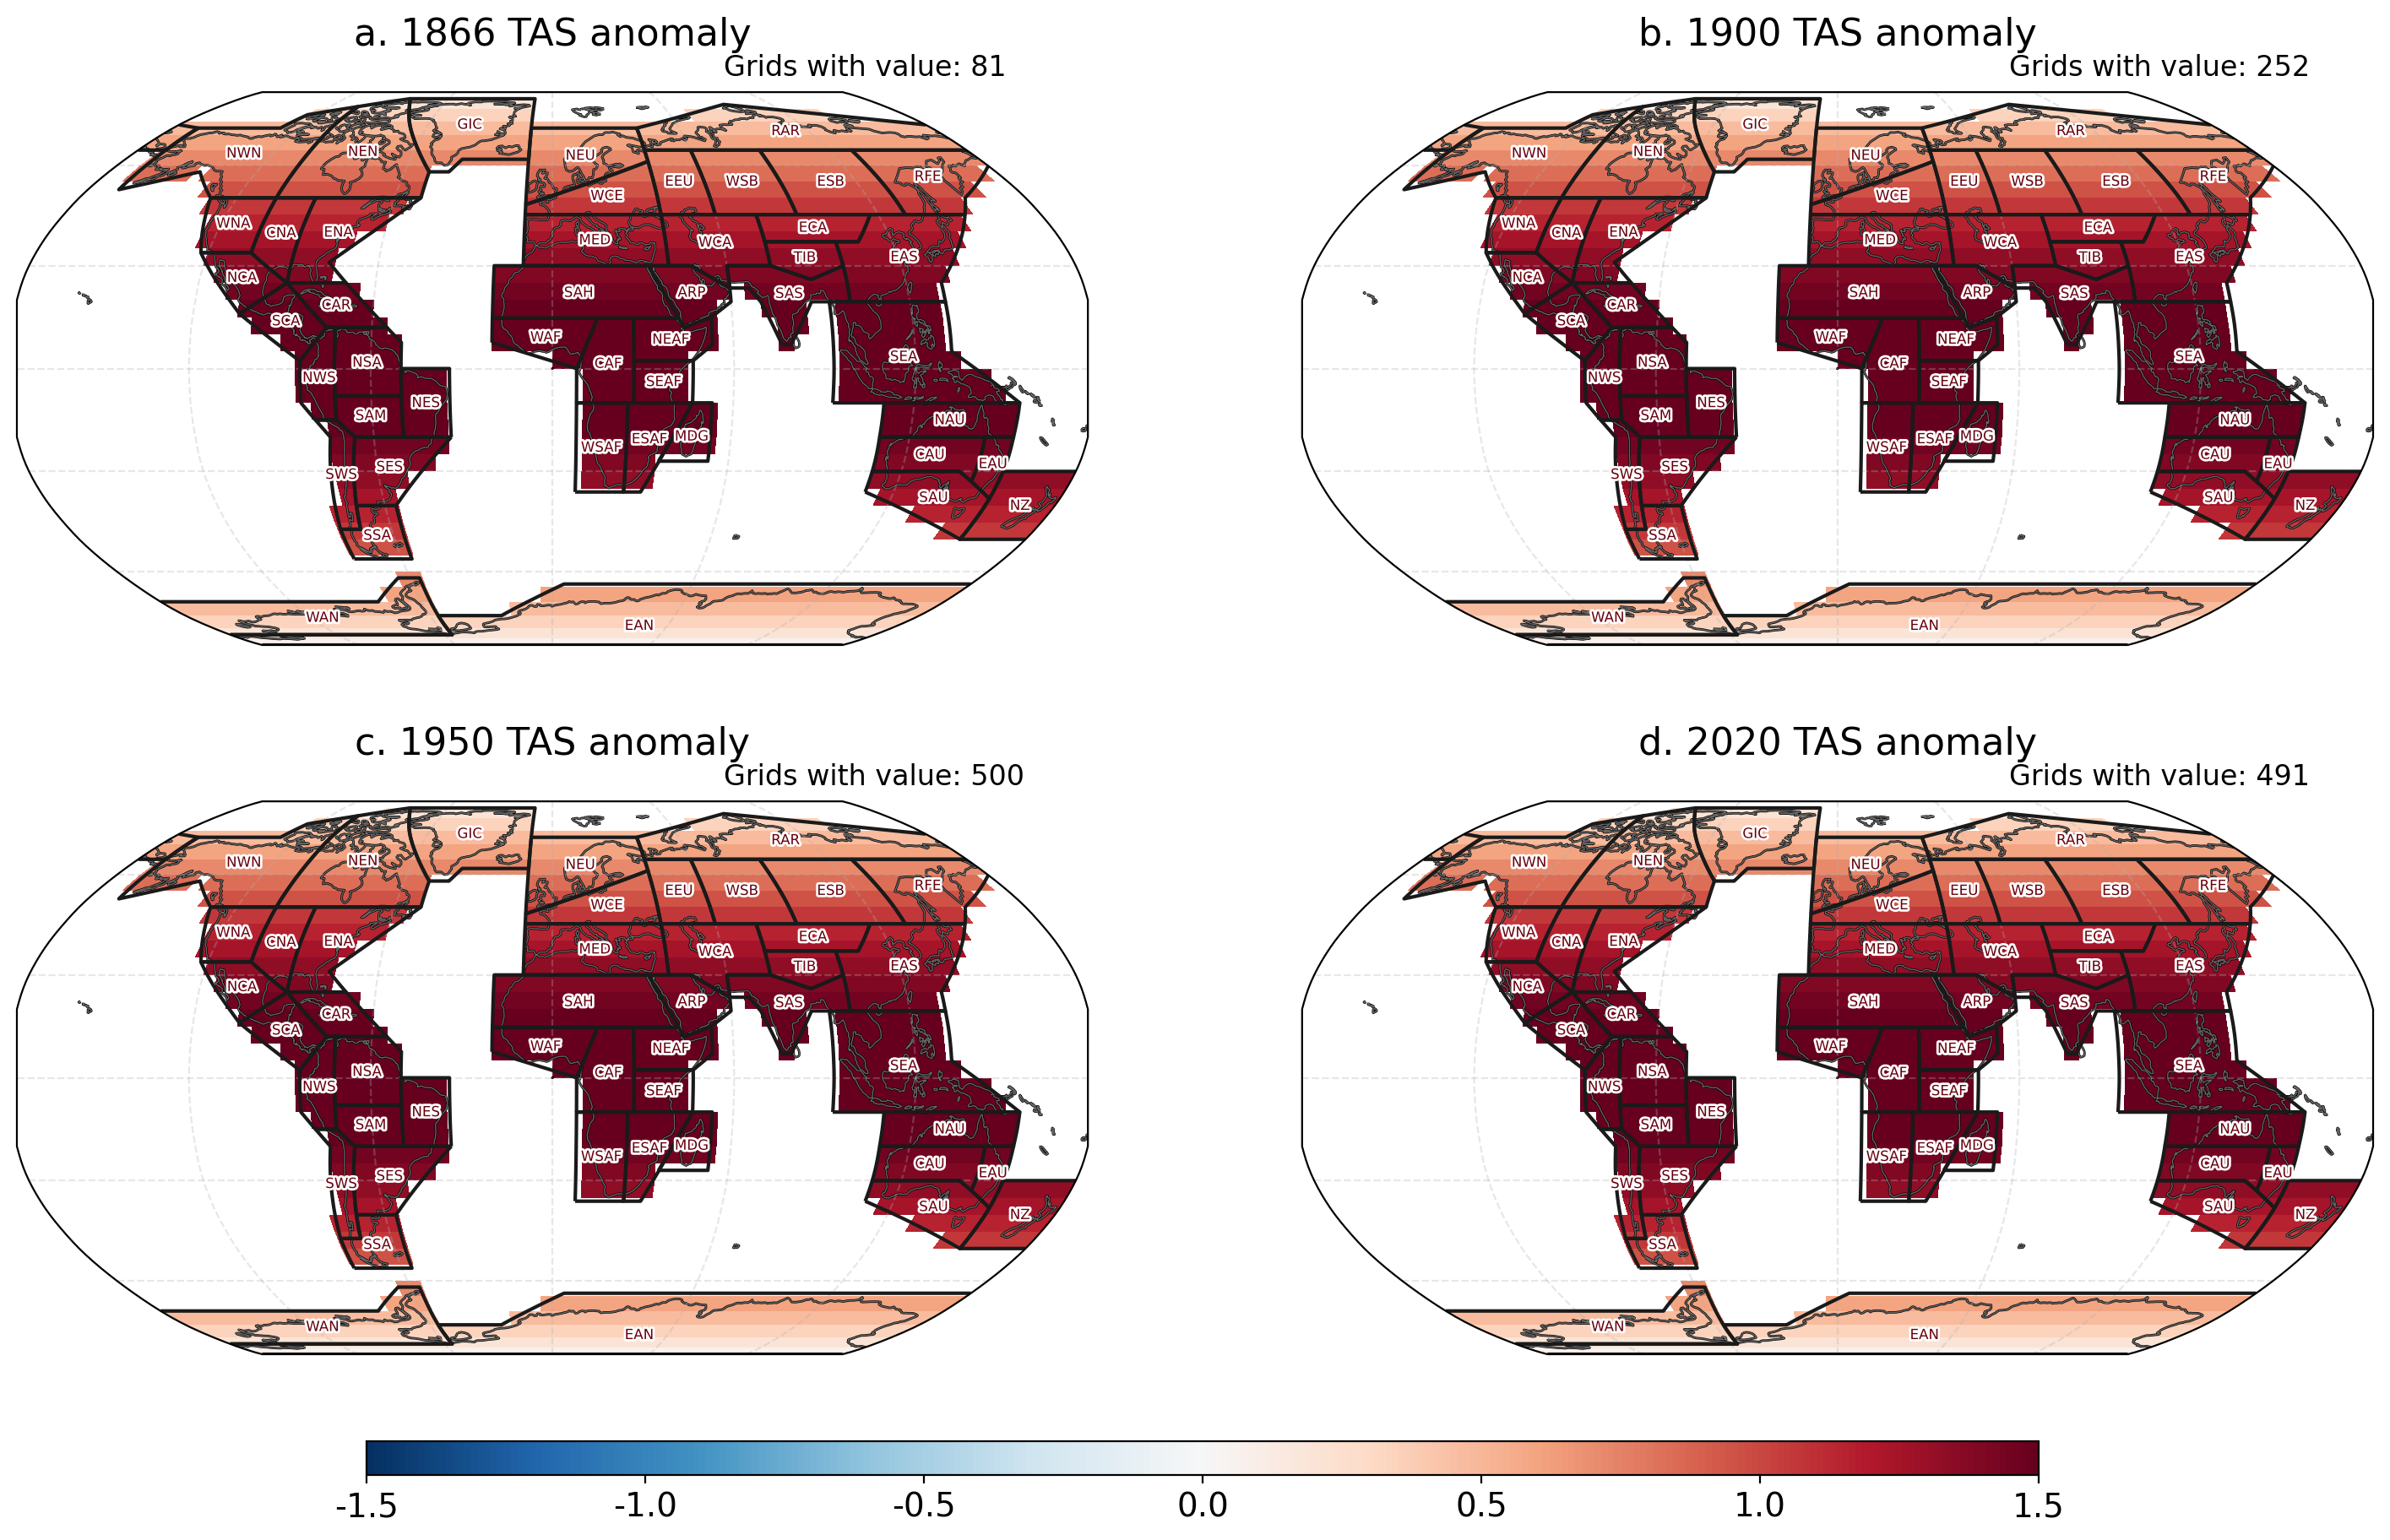

In [39]:
weights = np.cos(np.deg2rad(tas_data.lat))
weights = weights / weights.mean()
weights = weights.broadcast_like(tas_data)

weights_2d = weights.where(mask_ar6_land)
weights_2d
plot_tas_anomaly_maps(weights_2d, years, notnan_counts_grid_had, 
                          cmap=plt.cm.RdBu_r, vmin=-1.5, vmax=1.5, 
                          proj=ccrs.Robinson(), figsize=(18, 10), dpi=200)

In [24]:
global_ar6_mean_complete = (
    (tas_ar6_land * weights_ar6).sum(dim=("lat", "lon"))
    / weights_ar6.sum(dim=("lat", "lon"))
)
global_ar6_mean_complete

<xarray.DataArray (year: 175)> Size: 1kB
array([-7.05935489e-02, -5.08110586e-02, -4.23023677e-02, -4.69495064e-02,
       -2.89886339e-02, -7.58416924e-02, -9.21274444e-02, -1.34013621e-01,
       -9.60349167e-02, -3.64623894e-02, -8.19104806e-02, -5.42231960e-02,
       -9.39403357e-02, -7.93242559e-03, -8.03825451e-02, -3.69861652e-02,
       -4.33688737e-02, -6.17639130e-02, -3.59241074e-02, -3.05213359e-02,
       -5.37203783e-02, -8.68114043e-02, -5.70677430e-02, -6.86030198e-02,
       -9.13297077e-02, -1.65615474e-01, -1.09889329e-01, -4.00515527e-02,
        3.27815317e-02, -8.44924793e-02, -9.51133575e-02, -1.04001606e-01,
       -9.41290767e-02, -1.80552995e-01, -2.31049693e-01, -2.36668411e-01,
       -1.80152549e-01, -1.92040633e-01, -1.88788499e-01, -8.56359634e-02,
       -1.66528607e-01, -1.84795819e-01, -2.31118521e-01, -2.47898306e-01,
       -1.68059406e-01, -2.01026166e-01, -1.32413238e-01, -9.58912004e-02,
       -1.88094635e-01, -1.47397136e-01, -8.60736366e-02, -1.14185346e-01,
       -2.60177716e-01, -2.52604262e-01, -3.12787503e-01, -2.44526458e-01,
       -1.64771806e-01, -3.62443334e-01, -3.12121023e-01, -2.67587136e-01,
       -2.69273583e-01, -3.03901331e-01, -2.98309423e-01, -2.60922821e-01,
       -1.20455675e-01, -7.98993692e-02, -2.42716759e-01, -3.50808077e-01,
       -2.50916358e-01, -1.82810686e-01, -1.52552437e-01, -8.28477923e-02,
       -1.78842654e-01, -1.91681531e-01, -2.18694252e-01, -1.57749613e-01,
       -7.07770922e-02, -1.68971323e-01, -1.26915971e-01, -3.29326077e-01,
...
       -7.44595973e-02, -5.24555530e-02, -3.20118550e-02, -1.32640497e-01,
       -2.35666126e-01, -9.47728801e-02, -6.34481427e-02,  1.16037375e-01,
       -1.11858920e-01, -1.42111834e-01, -3.33920625e-01, -7.25827630e-02,
        3.24289798e-02,  9.19568952e-04, -5.63806512e-02,  4.14463590e-02,
        4.30654403e-02,  2.99729574e-02, -2.58060798e-01, -2.01718882e-01,
       -1.19128966e-01, -8.99246122e-02, -1.83820165e-01, -1.15523629e-01,
       -5.16445627e-02, -1.53398857e-01, -2.05792110e-01,  1.46131326e-01,
       -2.21009923e-01, -1.33615447e-02, -2.92393749e-01,  5.33396638e-02,
       -3.14810187e-02,  2.55147614e-02,  1.14783711e-01,  2.72907560e-01,
       -9.49300247e-03,  2.85551899e-01, -4.43968953e-02, -1.33392075e-02,
        7.66009799e-02,  2.04762940e-01,  3.20622859e-01,  2.07961416e-01,
        4.00433295e-01,  2.87795841e-01,  8.76328332e-02,  1.47096078e-01,
        2.56548285e-01,  4.70436670e-01,  1.85464538e-01,  4.05015212e-01,
        7.12180987e-01,  4.84229599e-01,  4.02197508e-01,  5.51876217e-01,
        6.07613110e-01,  6.14980913e-01,  5.07461418e-01,  6.99836772e-01,
        6.29580064e-01,  7.13608858e-01,  5.54638715e-01,  5.91868914e-01,
        7.81112249e-01,  5.71203820e-01,  6.23038570e-01,  6.67102501e-01,
        6.86576830e-01,  9.10400470e-01,  1.02983477e+00,  8.91867604e-01,
        7.19153564e-01,  8.49023806e-01,  9.63878329e-01,  8.07269435e-01,
        8.19049608e-01,  1.05946169e+00,  1.08931913e+00])
Coordinates:
    realization  int64 8B 100
  * year         (year) int64 1kB 1850 1851 1852 1853 ... 2021 2022 2023 2024

In [40]:
weights = np.cos(np.deg2rad(tas_data.lat))
weights = weights / weights.sum()
weights_2d = weights.broadcast_like(tas_data)

# Step 6: Apply weights and compute global mean
tas_weighted = tas_ar6_land.weighted(weights_2d)
global_ar6_mean_complete = tas_weighted.mean(dim=("lat", "lon"))

tas_global_mean

<xarray.DataArray 'tas_mean' (year: 175)> Size: 1kB
array([-3.79453315e-01, -2.78168741e-01, -2.25352139e-01, -2.42497682e-01,
       -1.18614788e-01, -3.02818836e-01, -3.23277154e-01, -4.68624458e-01,
       -3.77793498e-01, -1.43213478e-01, -3.75681639e-01, -3.48506242e-01,
       -5.81100059e-01, -5.23520969e-02, -5.87645353e-01, -2.62743450e-01,
       -2.95285924e-01, -4.23394923e-01, -2.11229904e-01, -1.44367282e-01,
       -2.48041578e-01, -4.20026307e-01, -2.29000916e-01, -2.79637995e-01,
       -3.51907357e-01, -6.02115503e-01, -4.09999214e-01, -1.40719358e-01,
        1.12870473e-01, -2.66696016e-01, -2.84808261e-01, -2.88412524e-01,
       -2.54837861e-01, -4.61313992e-01, -5.67493750e-01, -5.60077066e-01,
       -4.17492155e-01, -4.50233644e-01, -4.37657273e-01, -2.02080190e-01,
       -3.78166407e-01, -4.33709281e-01, -5.49795924e-01, -5.71863740e-01,
       -3.90855372e-01, -4.55032486e-01, -2.97351422e-01, -2.11411152e-01,
       -4.13151345e-01, -3.13821414e-01, -1.92290541e-01, -2.35335433e-01,
       -4.94394348e-01, -4.76769801e-01, -5.80682512e-01, -4.47085512e-01,
       -2.96289712e-01, -6.29012619e-01, -5.38700335e-01, -4.60726729e-01,
       -4.52878605e-01, -5.05016863e-01, -5.00612706e-01, -4.30958689e-01,
       -1.98861793e-01, -1.37587920e-01, -4.14209489e-01, -5.85056345e-01,
       -4.51833464e-01, -3.28563066e-01, -2.74228117e-01, -1.41034094e-01,
       -2.91358084e-01, -3.05129630e-01, -3.45562404e-01, -2.46978486e-01,
       -1.09209705e-01, -2.59449216e-01, -1.95793352e-01, -5.04484579e-01,
...
       -1.01476817e-01, -6.99942158e-02, -4.26775215e-02, -1.74790367e-01,
       -3.06524695e-01, -1.17293389e-01, -7.81708699e-02,  1.41706067e-01,
       -1.35941611e-01, -1.71762388e-01, -4.03516314e-01, -8.64053386e-02,
        3.85817855e-02,  1.08941738e-03, -6.64272077e-02,  4.80539438e-02,
        4.98699532e-02,  3.46650381e-02, -2.98602653e-01, -2.32551096e-01,
       -1.36630678e-01, -1.03329684e-01, -2.10728403e-01, -1.32470006e-01,
       -5.89398585e-02, -1.76037909e-01, -2.36152300e-01,  1.67518564e-01,
       -2.53204816e-01, -1.53072198e-02, -3.35012933e-01,  6.12697602e-02,
       -3.59711781e-02,  2.91949534e-02,  1.31050864e-01,  3.13402363e-01,
       -1.09848811e-02,  3.29883567e-01, -5.12876770e-02, -1.53039569e-02,
        8.80544042e-02,  2.36711297e-01,  3.69669852e-01,  2.40255837e-01,
        4.66048787e-01,  3.38540994e-01,  1.02986764e-01,  1.72899503e-01,
        3.00794225e-01,  5.49194323e-01,  2.18421742e-01,  4.78663663e-01,
        8.35825592e-01,  5.67169679e-01,  4.72716714e-01,  6.54280184e-01,
        7.14708077e-01,  7.23130438e-01,  5.98044013e-01,  8.34565807e-01,
        7.44190867e-01,  8.38934441e-01,  6.55205592e-01,  6.98041676e-01,
        9.20611417e-01,  6.86553628e-01,  7.49320779e-01,  8.06646377e-01,
        8.37412892e-01,  1.11380163e+00,  1.25500006e+00,  1.09941467e+00,
        8.96323524e-01,  1.07077889e+00,  1.22551967e+00,  1.02094396e+00,
        1.03089099e+00,  1.37630137e+00,  1.47740056e+00])
Coordinates:
    realization  int64 8B 100
  * year         (year) int64 1kB 1850 1851 1852 1853 ... 2021 2022 2023 2024

### only land


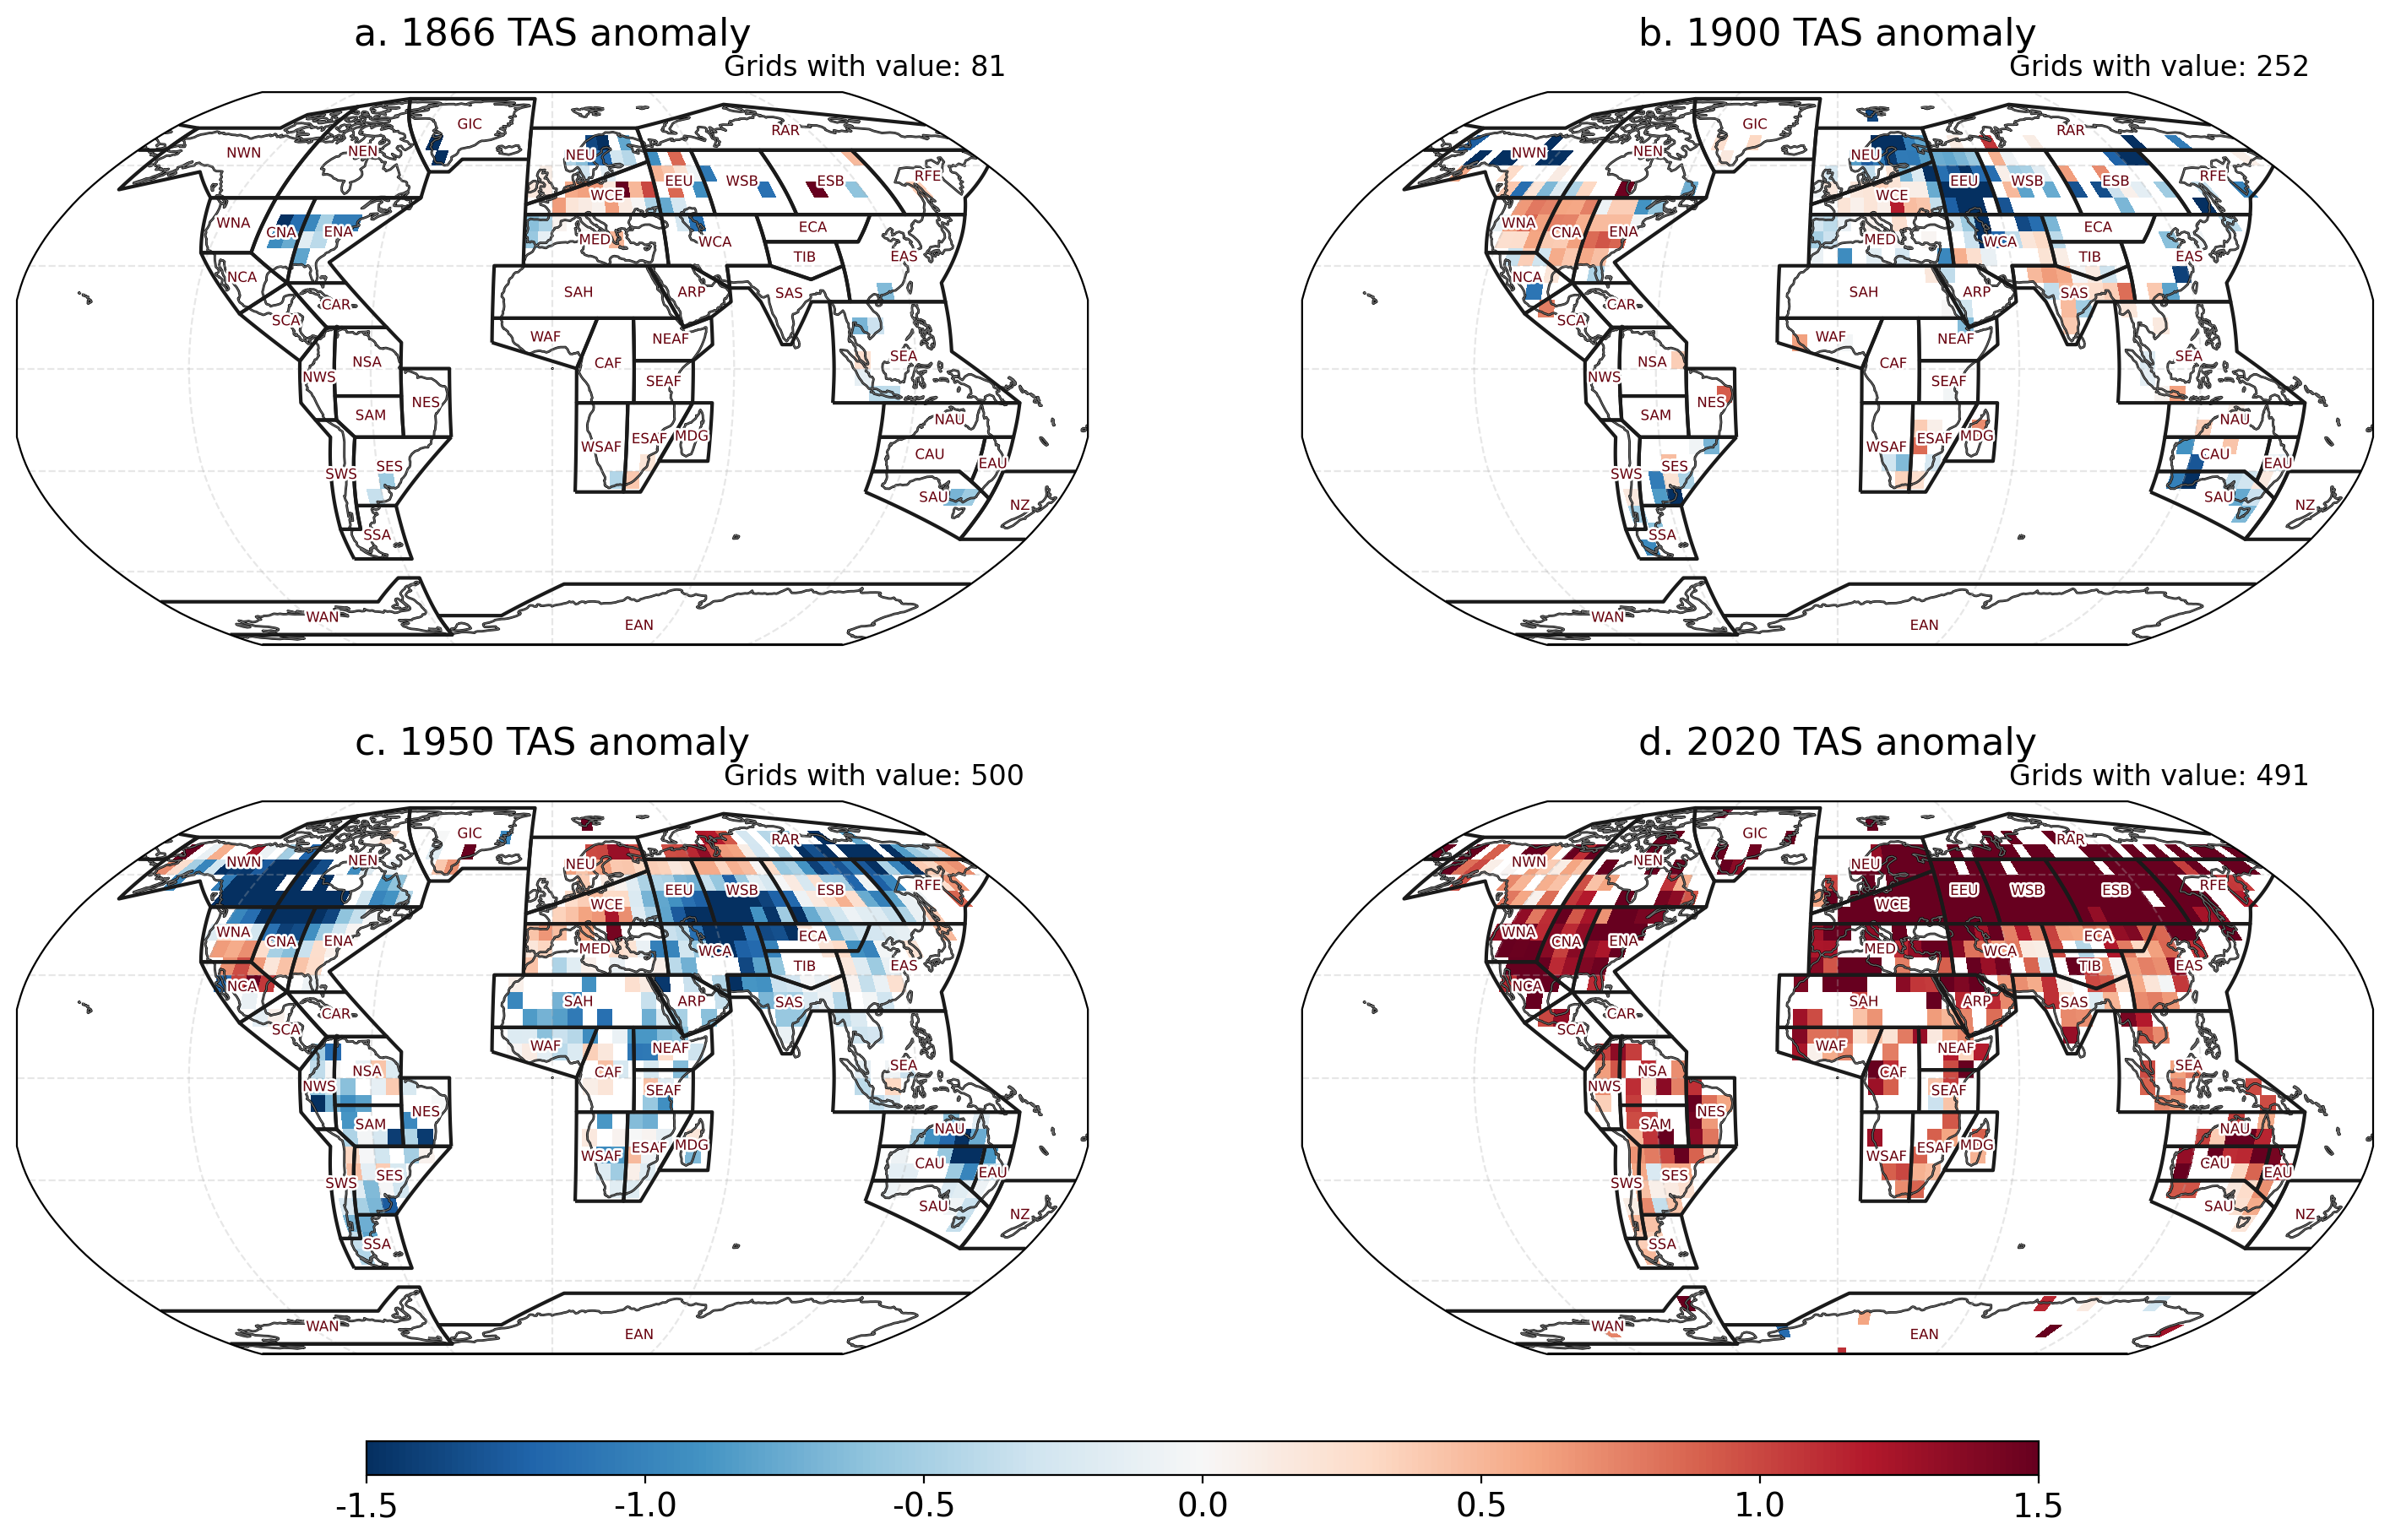

In [34]:
import pooch
import geopandas as gp

file = pooch.retrieve(
    "https://pubs.usgs.gov/of/2006/1187/basemaps/continents/continents.zip", None
)
continents = gp.read_file("zip://" + file)
continents_filtered = continents[continents["CONTINENT"] != "Oceania"].reset_index(drop=True)

# Step 2: Create regionmask and mask land
mask = regionmask.mask_geopandas(continents_filtered, tas_data['lon'], tas_data['lat'])
tas_land = tas_data.where(mask.notnull())

tas_land
notnan_counts_grid_had, notnan_percent_had = notnan_count(tas_land)

plot_tas_anomaly_maps(tas_land, years, notnan_counts_grid_had, 
                          cmap=plt.cm.RdBu_r, vmin=-1.5, vmax=1.5, 
                          proj=ccrs.Robinson(), figsize=(18, 10), dpi=200)